# **Telecom X Predicción de Cancelación (Churn)**

¡Felicidades! 🎉 Has sido promovido después de tu excelente desempeño en el análisis exploratorio de la cancelación de clientes en Telecom X. Tu dedicación, claridad al comunicar los datos y visión estratégica marcaron la diferencia.

Ahora, ¡has sido invitado oficialmente a formar parte del equipo de Machine Learning de la empresa!

🎯 Misión

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

# **Librerias**

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

import pickle

# **Extracción del Archivo Tratado**

Carga el archivo CSV que contiene los datos tratados anteriormente.
📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [4]:
datos_tratados = pd.read_csv('/content/datos_tratados_telecom_final.csv')
datos_tratados = datos_tratados.fillna(0)
datos_tratados

,ID_Cliente,Churn,Genero_Cliente,Cliente_Tercera_Edad,Cliente_Pareja,Cliente_Dependientes,Antiguedad_Meses,Servicio_Telefono,Multiples_Lineas,Servicio_Internet,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Facturacion_Electronica,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,0002-ORFBO,0.0,0,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0.0,1,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1.0,1,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1.0,1,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1.0,0,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0.0,0,0,0,0,13,1,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,1.0,1,0,1,0,22,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,0.0,1,0,0,0,2,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0.0,1,0,1,1,67,1,0,DSL,1,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26


In [5]:
datos_tratados.isna().any().any()

np.False_

In [6]:
datos_tratados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               7267 non-null   object 
 1   Churn                    7267 non-null   float64
 2   Genero_Cliente           7267 non-null   int64  
 3   Cliente_Tercera_Edad     7267 non-null   int64  
 4   Cliente_Pareja           7267 non-null   int64  
 5   Cliente_Dependientes     7267 non-null   int64  
 6   Antiguedad_Meses         7267 non-null   int64  
 7   Servicio_Telefono        7267 non-null   int64  
 8   Multiples_Lineas         7267 non-null   int64  
 9   Servicio_Internet        7267 non-null   object 
 10  Seguridad_Online         7267 non-null   int64  
 11  Respaldo_Online          7267 non-null   int64  
 12  Proteccion_Dispositivo   7267 non-null   int64  
 13  Soporte_Tecnico          7267 non-null   int64  
 14  Streaming_TV            

In [7]:
datos_tratados.describe()

,Churn,Genero_Cliente,Cliente_Tercera_Edad,Cliente_Pareja,Cliente_Dependientes,Antiguedad_Meses,Servicio_Telefono,Multiples_Lineas,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Facturacion_Electronica,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.505711,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157292
std,0.437115,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.340000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


**Eliminación de Columnas Irrelevantes**

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [8]:
datos_tratados = datos_tratados.drop(['ID_Cliente'], axis=1)
datos_tratados

,Churn,Genero_Cliente,Cliente_Tercera_Edad,Cliente_Pareja,Cliente_Dependientes,Antiguedad_Meses,Servicio_Telefono,Multiples_Lineas,Servicio_Internet,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Facturacion_Electronica,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,0.0,0,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.19
1,0.0,1,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.00
2,1.0,1,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,1.0,1,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,1.0,0,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,0,0,0,0,13,1,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.84
7263,1.0,1,0,1,0,22,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.84
7264,0.0,1,0,0,0,2,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,0.0,1,0,1,1,67,1,0,DSL,1,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26


## **Encoding**

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como **[one-hot encoding](https://www.google.com/url?q=https%3A%2F%2Fscikit-learn.org%2Fstable%2Fmodules%2Fgenerated%2Fsklearn.preprocessing.OneHotEncoder.html)**.

## **codificación categorica**

In [9]:
categoricas = [
    'Genero_Cliente',
    'Cliente_Pareja',
    'Cliente_Dependientes',
    'Servicio_Internet',
    'Tipo_Contrato',
    'Facturacion_Electronica',
    'Metodo_Pago'
]

ohe = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
     categoricas),
    remainder='passthrough')

datos_ohe = ohe.fit_transform(datos_tratados)
datos_ohe = pd.DataFrame(datos_ohe, columns=ohe.get_feature_names_out())
datos_ohe

,onehotencoder__Genero_Cliente_0,onehotencoder__Genero_Cliente_1,onehotencoder__Cliente_Pareja_0,onehotencoder__Cliente_Pareja_1,onehotencoder__Cliente_Dependientes_0,onehotencoder__Cliente_Dependientes_1,onehotencoder__Servicio_Internet_DSL,onehotencoder__Servicio_Internet_Fiber optic,onehotencoder__Servicio_Internet_No,onehotencoder__Tipo_Contrato_Month-to-month,onehotencoder__Tipo_Contrato_One year,onehotencoder__Tipo_Contrato_Two year,onehotencoder__Facturacion_Electronica_0,onehotencoder__Facturacion_Electronica_1,onehotencoder__Metodo_Pago_Bank transfer (automatic),onehotencoder__Metodo_Pago_Credit card (automatic),onehotencoder__Metodo_Pago_Electronic check,onehotencoder__Metodo_Pago_Mailed check,remainder__Churn,remainder__Cliente_Tercera_Edad,remainder__Antiguedad_Meses,remainder__Servicio_Telefono,remainder__Multiples_Lineas,remainder__Seguridad_Online,remainder__Respaldo_Online,remainder__Proteccion_Dispositivo,remainder__Soporte_Tecnico,remainder__Streaming_TV,remainder__Streaming_Peliculas,remainder__Cargos_Mensuales,remainder__Cargos_Totales,remainder__Cuentas_Diarias
0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,65.60,593.30,2.19
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,59.90,542.40,2.00
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,73.90,280.85,2.46
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,13.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,98.00,1237.85,3.27
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,55.15,742.90,1.84
7263,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,22.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,85.10,1873.70,2.84
7264,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50.30,92.75,1.68
7265,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,67.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,67.85,4627.65,2.26


In [10]:
datos_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   onehotencoder__Genero_Cliente_0                       7267 non-null   float64
 1   onehotencoder__Genero_Cliente_1                       7267 non-null   float64
 2   onehotencoder__Cliente_Pareja_0                       7267 non-null   float64
 3   onehotencoder__Cliente_Pareja_1                       7267 non-null   float64
 4   onehotencoder__Cliente_Dependientes_0                 7267 non-null   float64
 5   onehotencoder__Cliente_Dependientes_1                 7267 non-null   float64
 6   onehotencoder__Servicio_Internet_DSL                  7267 non-null   float64
 7   onehotencoder__Servicio_Internet_Fiber optic          7267 non-null   float64
 8   onehotencoder__Servicio_Internet_No                   7267

##**Análisis de Correlación**

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

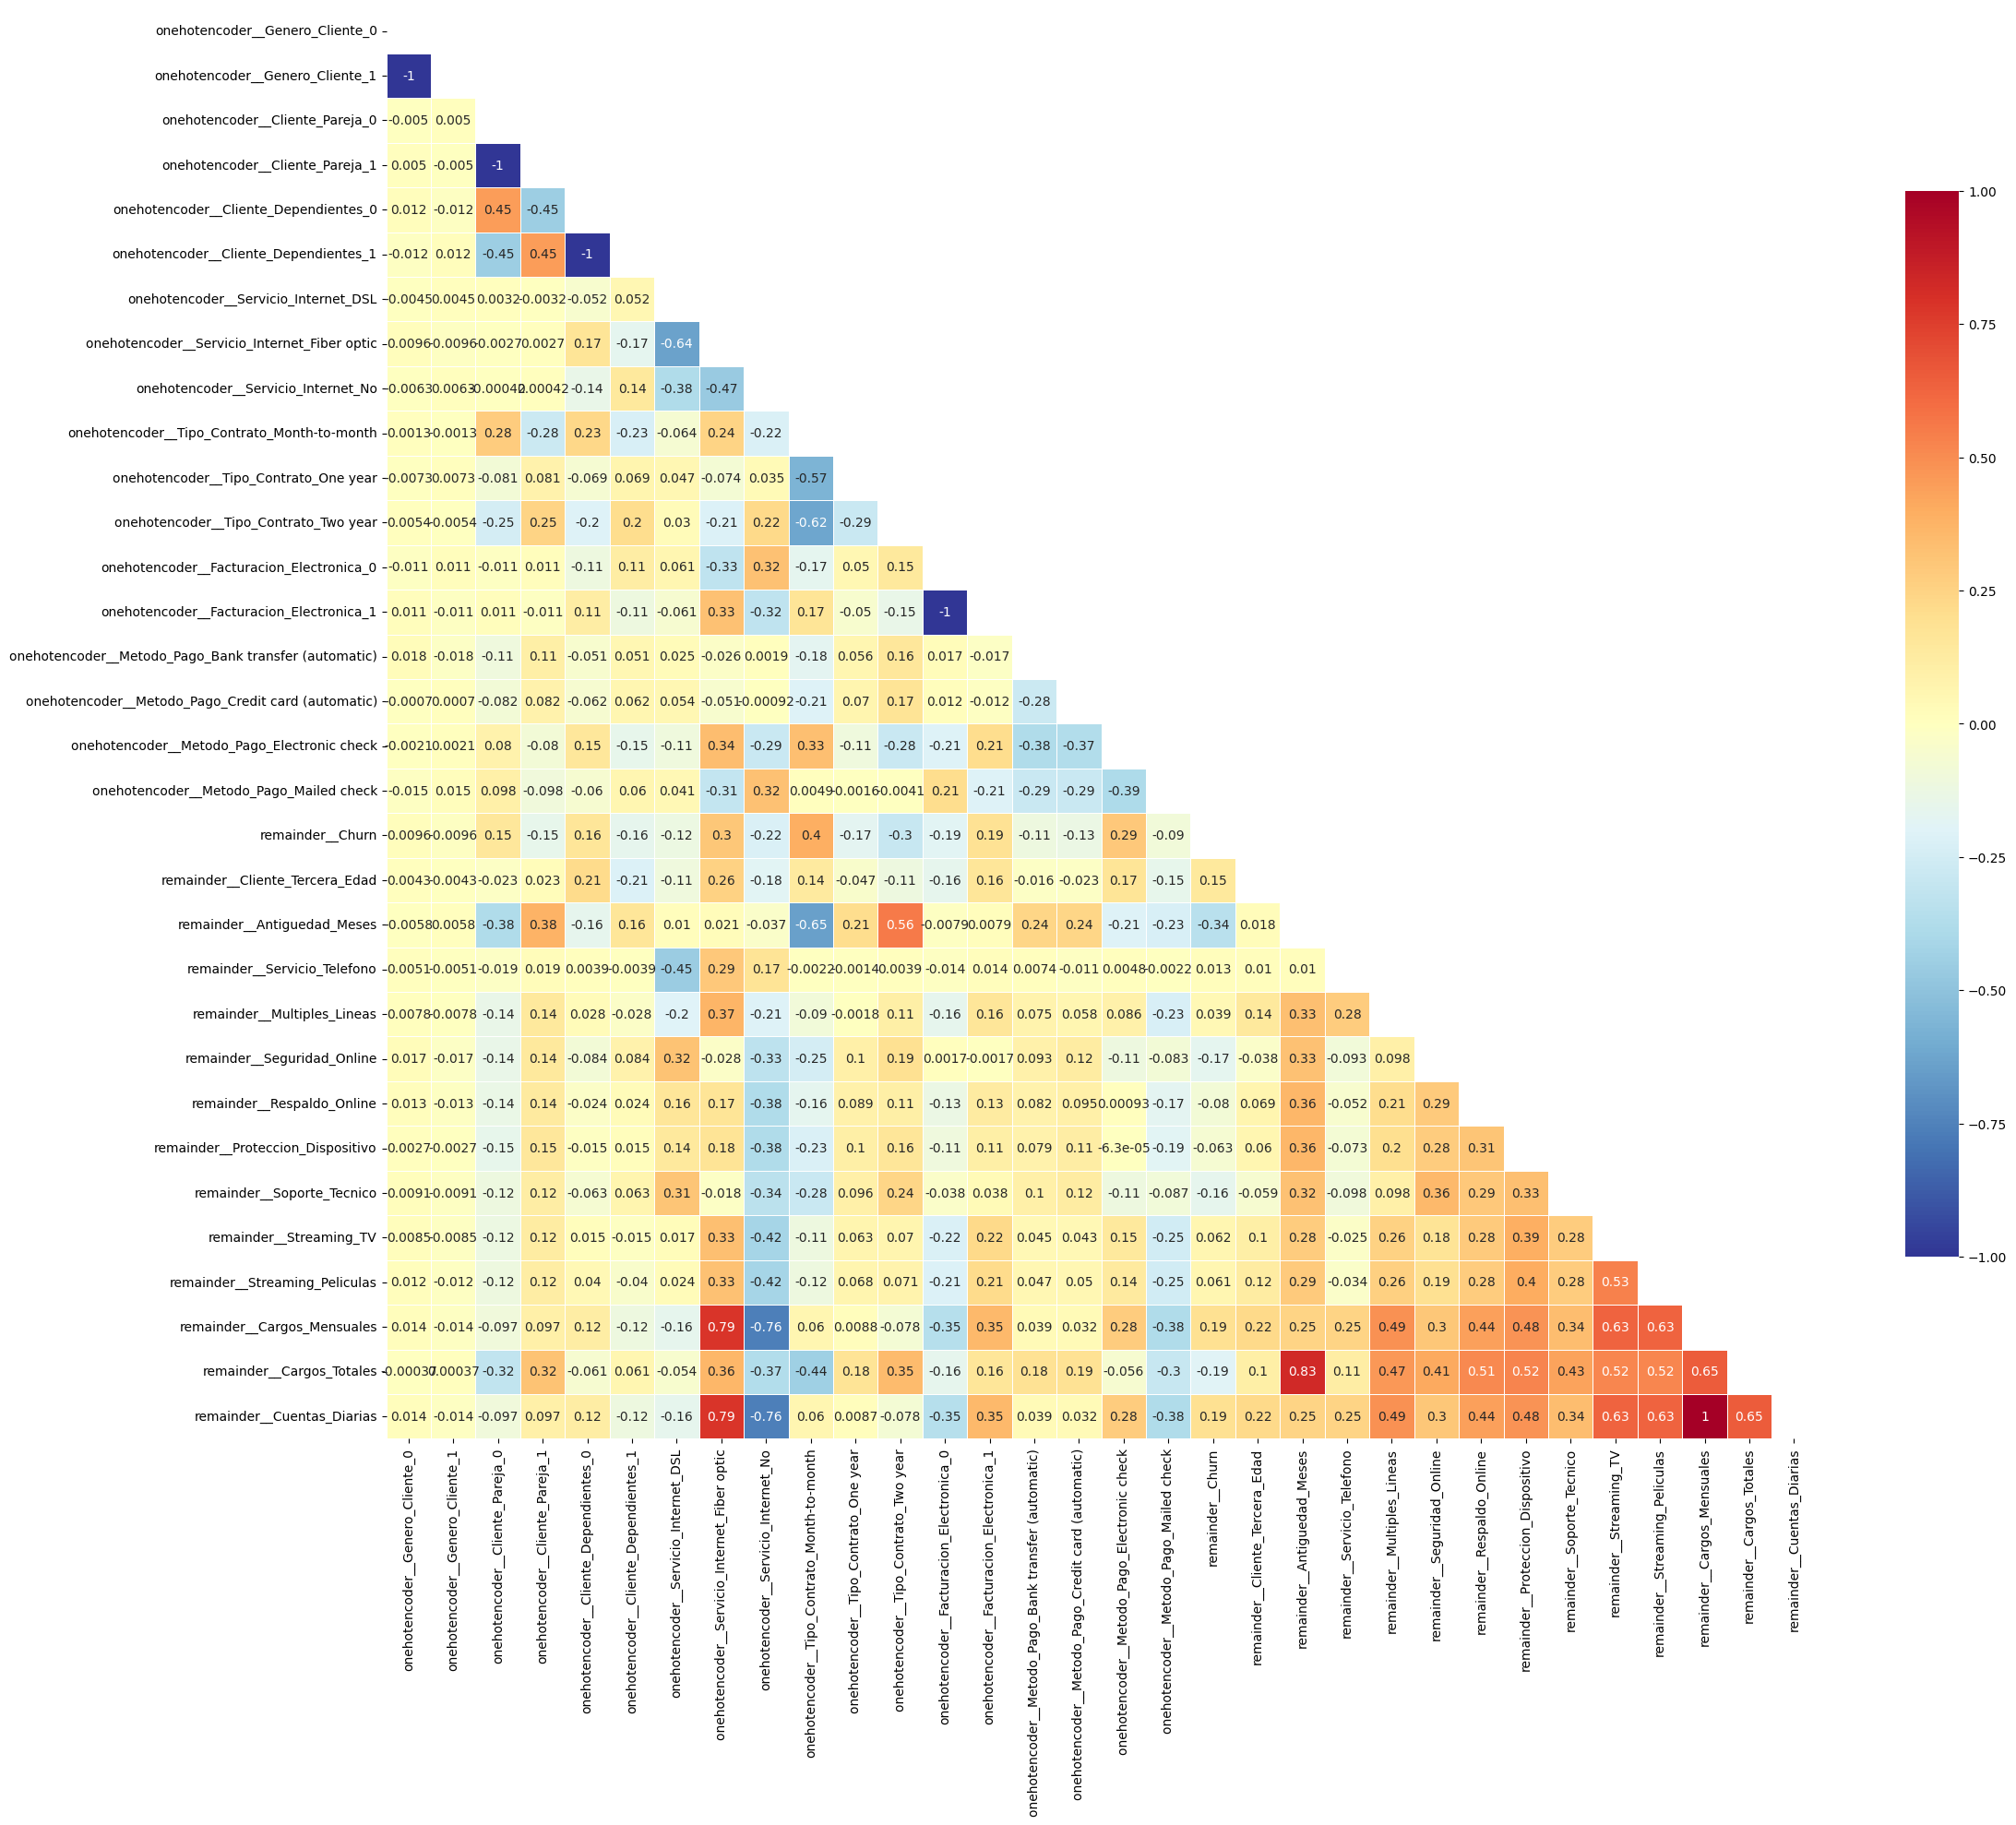

In [57]:
correlacion = datos_ohe.corr()

mascara = np.zeros_like(correlacion, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(25, 30))

# Generar el mapa de calor (heatmap)
cmap = sns.color_palette("RdYlBu_r", as_cmap=True)

sns.heatmap(correlacion, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

## **Verificación de la Proporción de Cancelación (Churn)**

In [12]:
datos_ohe['remainder__Churn'].value_counts(normalize=True)

,proportion
remainder__Churn,
0.0,0.74281
1.0,0.25719


## **Análisis Dirigido**

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

### **Servicios versus Churn**

### **Cargos totales**



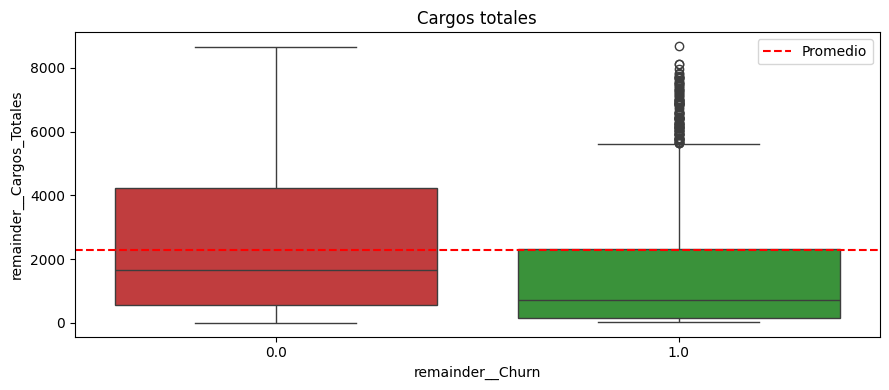

In [54]:
# Calcular el promedio de total_services
total_services_media = datos_ohe['remainder__Cargos_Totales'].mean()

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(9,4))

# Hacer el boxplot: comparar total_services entre clientes que se fueron (1) y no se fueron (0)
sns.boxplot(data=datos_ohe,
            x='remainder__Churn',
            y='remainder__Cargos_Totales',
            palette=['#d62728', '#2ca02c'],
            ax=ax
            )

# Título y línea del promedio
ax.set_title('Cargos totales')
ax.axhline(y=total_services_media, color='r', linestyle='--', label='Promedio')
ax.legend()

plt.tight_layout()

plt.show()

### **Clientes con soporte técnico**

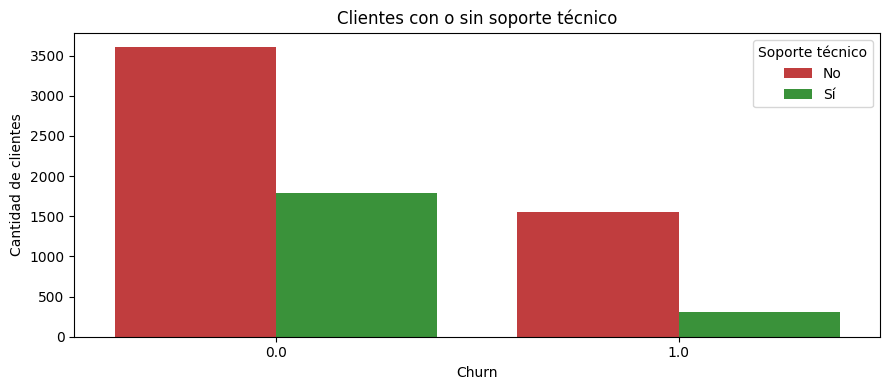

In [50]:
# Calcular el promedio de total_services
total_services_media = datos_ohe['remainder__Soporte_Tecnico'].mean()

fig, ax = plt.subplots(figsize=(9, 4))

sns.countplot(data=datos_ohe,
              x='remainder__Churn',
              hue='remainder__Soporte_Tecnico',
              palette=['#d62728', '#2ca02c'],
              ax=ax
              )

ax.set_title('Clientes con o sin soporte técnico')
ax.set_xlabel('Churn')
ax.set_ylabel('Cantidad de clientes')
ax.legend(title='Soporte técnico', labels=['No', 'Sí'])

plt.tight_layout()
plt.show()

### **Protección de dispositivo**

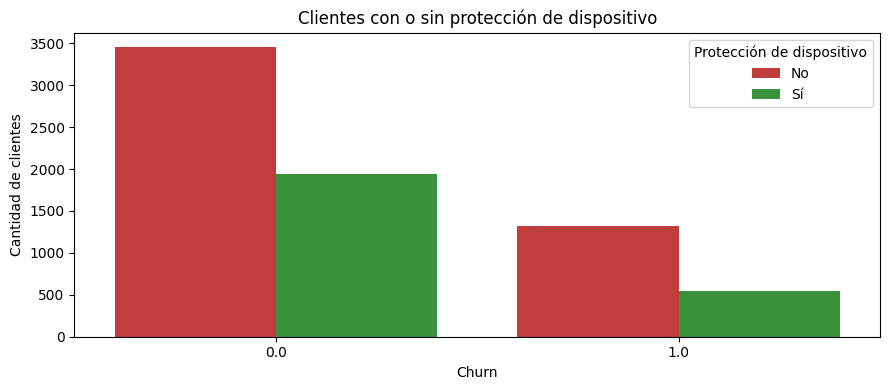

In [51]:
fig, ax = plt.subplots(figsize=(9, 4))

sns.countplot(data=datos_ohe,
              x='remainder__Churn',
              hue='remainder__Proteccion_Dispositivo',
              palette=['#d62728', '#2ca02c'],
              ax=ax
              )

ax.set_title('Clientes con o sin protección de dispositivo')
ax.set_xlabel('Churn')
ax.set_ylabel('Cantidad de clientes')
ax.legend(title='Protección de dispositivo', labels=['No', 'Sí'])

plt.tight_layout()
plt.show()

### **Respaldo en línea**

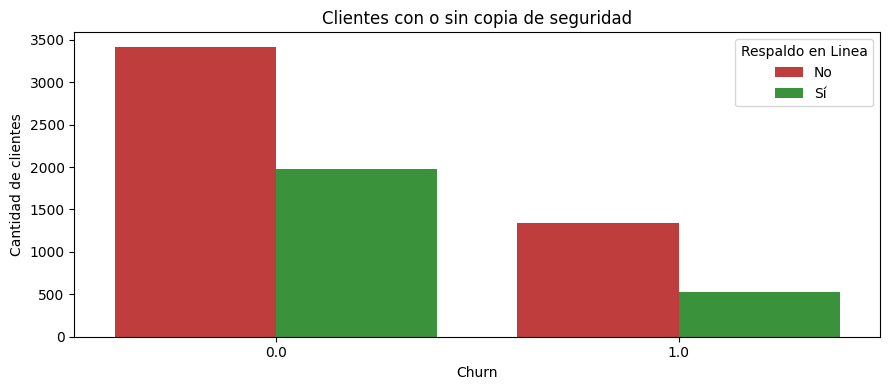

In [52]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(9, 4))

# Crear el gráfico de conteo
sns.countplot(data=datos_ohe,
              x='remainder__Churn',
              hue='remainder__Respaldo_Online',
              palette=['#d62728', '#2ca02c'],
              ax=ax
              )

# Título y etiquetas
ax.set_title('Clientes con o sin copia de seguridad')
ax.set_xlabel('Churn')
ax.set_ylabel('Cantidad de clientes')

# Leyenda personalizada
ax.legend(title='Respaldo en Linea', labels=['No', 'Sí'])

# Ajustes finales
plt.tight_layout()
plt.show()

### **Seguridad en línea**

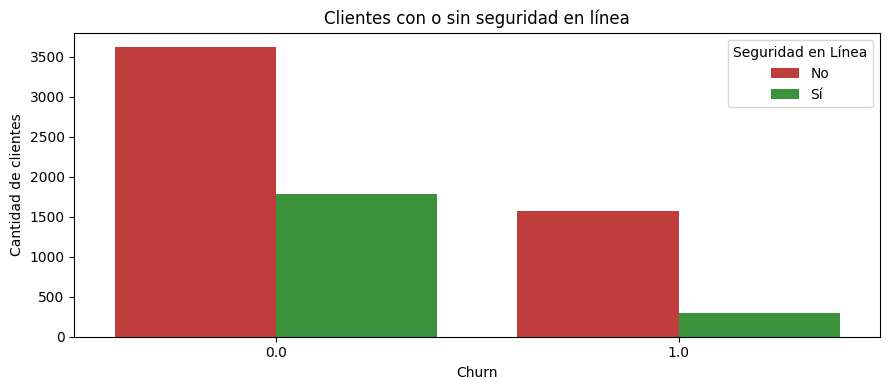

In [49]:
# Crear figura y eje
fig, ax = plt.subplots(figsize=(9, 4))

# Gráfico de conteo
sns.countplot(data=datos_ohe,
              x='remainder__Churn',
              hue='remainder__Seguridad_Online',
              palette=['#d62728', '#2ca02c'],
              ax=ax
             )

# Título y etiquetas
ax.set_title('Clientes con o sin seguridad en línea')
ax.set_xlabel('Churn')
ax.set_ylabel('Cantidad de clientes')

# Leyenda
ax.legend(title='Seguridad en Línea', labels=['No', 'Sí'])

# Ajustes finales
plt.tight_layout()
plt.show()

### **Antiguedad o permanencia del cliente**

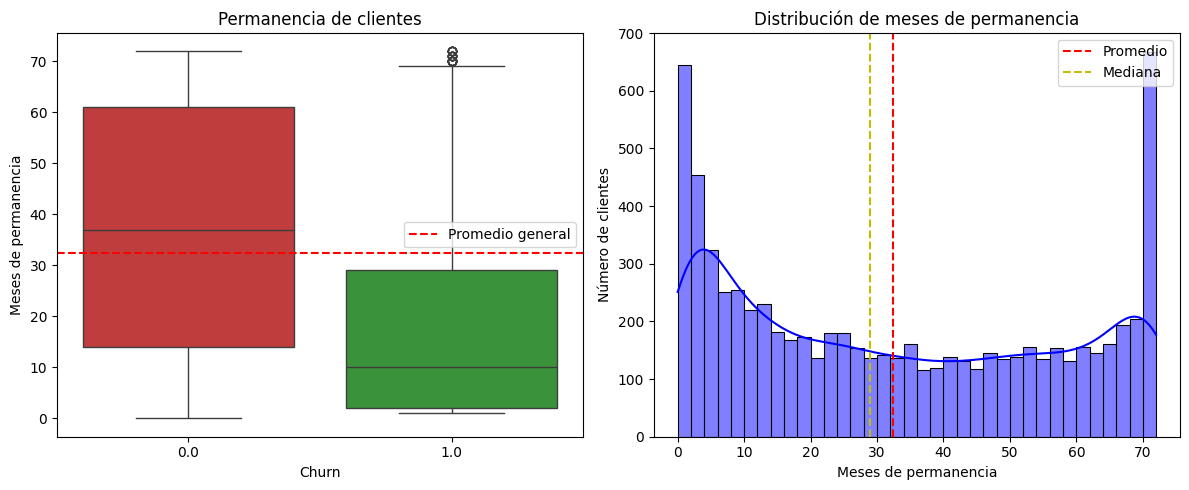

In [60]:
# Calcular medidas estadísticas
tenure_promedio = datos_ohe['remainder__Antiguedad_Meses'].mean()
tenure_mediana = datos_ohe['remainder__Antiguedad_Meses'].median()

# Crear figura y ejes
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: Boxplot
sns.boxplot(
    data=datos_ohe,
    x='remainder__Churn',
    y='remainder__Antiguedad_Meses',
    palette=['#d62728', '#2ca02c'],
    ax=ax[0]
)
ax[0].set_title('Permanencia de clientes')
ax[0].set_xlabel('Churn')
ax[0].set_ylabel('Meses de permanencia')
ax[0].axhline(y=tenure_promedio, color='r', linestyle='--', label='Promedio general')
ax[0].legend()

# Gráfico 2: Histograma
sns.histplot(
    data=datos_ohe,
    x='remainder__Antiguedad_Meses',
    kde=True,
    ax=ax[1],
    binwidth=2,
    color='blue'
)
ax[1].set_title('Distribución de meses de permanencia')
ax[1].set_xlabel('Meses de permanencia')
ax[1].set_ylabel('Número de clientes')
ax[1].axvline(x=tenure_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=tenure_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()

# Ajustar diseño
plt.tight_layout()
plt.show()

Las proporciones estan algo desiguales

# **Modelo predictivo**

## **Separación de Datos**

In [19]:
X = datos_ohe.drop(['remainder__Churn'], axis=1)
y = datos_ohe['remainder__Churn']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,         # 20% para prueba
    stratify=y,            # mantiene proporciones de clases
    random_state=42        # para reproducibilidad
)

## **Normalizacon / Estandarizacion**

Solo para modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Balanceo de clases**

In [22]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# **Creación de Modelos**

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

    Un modelo puede requerir normalización, como Regresión Logística o KNN.
    El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

    Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.
    Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

## **Modelo Random Forest Classifier**

In [23]:
modelo_random_forest = RandomForestClassifier(max_depth=5, random_state=42)
modelo_random_forest.fit(X_train, y_train)

y_predict = modelo_random_forest.predict(X_test)

In [24]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("F1 Score:", f1_score(y_test, y_predict))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_predict))
print("Reporte completo:\n", classification_report(y_test, y_predict))

matriz_confusion = confusion_matrix(y_test, y_predict)

Accuracy: 0.7971114167812929
Precision: 0.6680851063829787
Recall: 0.4197860962566845
F1 Score: 0.5155993431855501
Matriz de confusión:
 [[1002   78]
 [ 217  157]]
Reporte completo:
               precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      1080
         1.0       0.67      0.42      0.52       374

    accuracy                           0.80      1454
   macro avg       0.75      0.67      0.69      1454
weighted avg       0.78      0.80      0.78      1454



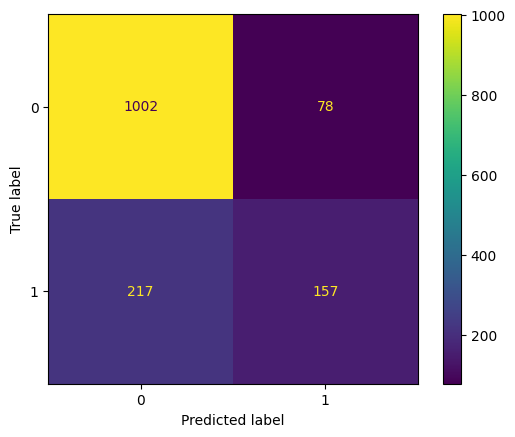

In [25]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion.plot();

In [26]:
importancias_random_forest = modelo_random_forest.feature_importances_
importancias_random_forest

array([0.00060737, 0.000999  , 0.00407661, 0.00309501, 0.0023349 ,
       0.00479978, 0.01583551, 0.09440884, 0.03735576, 0.18465272,
       0.02111652, 0.0634565 , 0.01448073, 0.01470101, 0.00089345,
       0.00305342, 0.07938578, 0.00263738, 0.00688913, 0.16640541,
       0.00162224, 0.0022279 , 0.02082257, 0.00460788, 0.00258571,
       0.02398671, 0.00397912, 0.00290499, 0.051122  , 0.10753464,
       0.05742141])

In [27]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importances': (importancias_random_forest * 100).round(2)}).sort_values('importances', ascending=False)
feature_importances

,feature,importances
9,onehotencoder__Tipo_Contrato_Month-to-month,18.47
19,remainder__Antiguedad_Meses,16.64
29,remainder__Cargos_Totales,10.75
7,onehotencoder__Servicio_Internet_Fiber optic,9.44
16,onehotencoder__Metodo_Pago_Electronic check,7.94
11,onehotencoder__Tipo_Contrato_Two year,6.35
30,remainder__Cuentas_Diarias,5.74
28,remainder__Cargos_Mensuales,5.11
8,onehotencoder__Servicio_Internet_No,3.74
25,remainder__Soporte_Tecnico,2.40


## **Modelo XGBoost**

In [28]:
modelo_xgb = XGBClassifier(
    max_depth=5,        # Profundidad de los árboles
    learning_rate=0.1,  # Tasa de aprendizaje
    n_estimators=100,   # Número de árboles
    subsample=0.8,      # Submuestreo (para regularización)
    colsample_bytree=0.8,  # Submuestreo de columnas
    use_label_encoder=False,  # Evitar warnings de versiones antiguas
    eval_metric='logloss',    # Métrica de evaluación
    random_state=42
)

In [29]:
# Entrenar el modelo
modelo_xgb.fit(X_train, y_train)

# Predecir
y_pred = modelo_xgb.predict(X_test)

In [30]:
# Evaluar
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte completo:\n", classification_report(y_test, y_pred))

matriz_confusion = confusion_matrix(y_test, y_pred)

Accuracy: 0.8039889958734525
Precision: 0.6529209621993127
Recall: 0.5080213903743316
F1 Score: 0.5714285714285714
Matriz de confusión:
 [[979 101]
 [184 190]]
Reporte completo:
               precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1080
         1.0       0.65      0.51      0.57       374

    accuracy                           0.80      1454
   macro avg       0.75      0.71      0.72      1454
weighted avg       0.79      0.80      0.80      1454



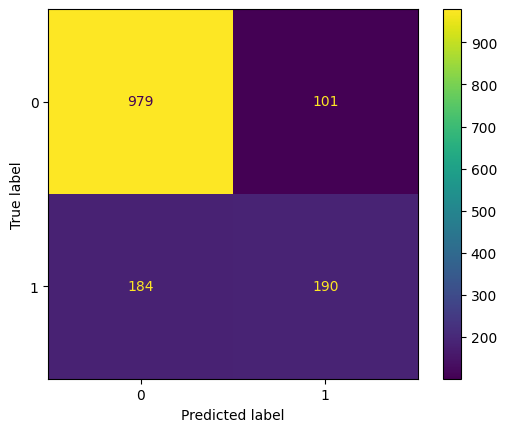

In [31]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion.plot();

## **Análisis de la Importancia de las Variables**

Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

    Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.
    KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.
    Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.
    SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.
    Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).

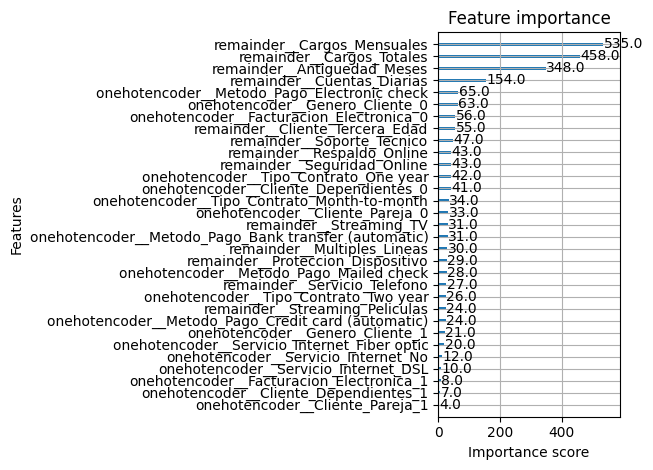

In [32]:
plot_importance(modelo_xgb)
plt.tight_layout()
plt.show()

## **Hiperparametros**

In [33]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [34]:
grid_search = GridSearchCV(
    estimator=modelo_xgb,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1      # Usa todos los núcleos disponibles para acelerar
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints...
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='r2', verbose=1)

In [35]:
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Usar el mejor modelo
mejor_modelo = grid_search.best_estimator_

# Predicciones
y_pred = mejor_modelo.predict(X_test)

# Evaluación
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

matriz_confusion = confusion_matrix(y_test, y_pred)

Mejores hiperparámetros encontrados:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Matriz de confusión:
 [[975 105]
 [183 191]]
Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1080
         1.0       0.65      0.51      0.57       374

    accuracy                           0.80      1454
   macro avg       0.74      0.71      0.72      1454
weighted avg       0.79      0.80      0.79      1454



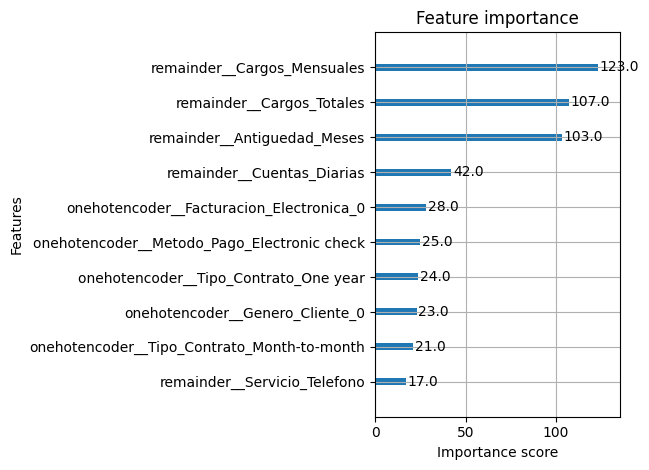

In [36]:
plot_importance(mejor_modelo, max_num_features=10)
plt.tight_layout()
plt.show()

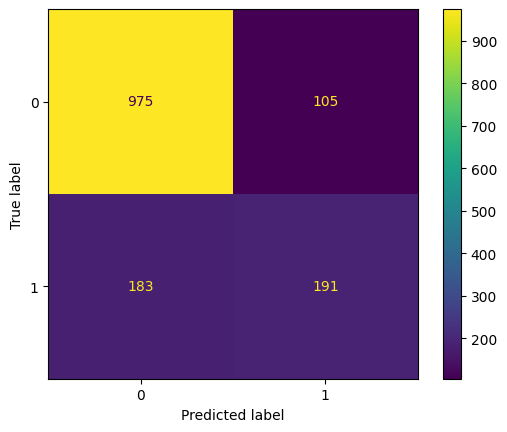

In [37]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion.plot();

## **Modelo KNN**

In [38]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='binary'))  # Usa 'macro' si es multiclase
print("Recall:", recall_score(y_test, y_pred, average='binary'))
print("F1 Score:", f1_score(y_test, y_pred, average='binary'))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte completo:\n", classification_report(y_test, y_pred))

matriz_confusion = confusion_matrix(y_test, y_pred)

Accuracy: 0.7627235213204951
Precision: 0.5481727574750831
Recall: 0.4411764705882353
F1 Score: 0.4888888888888889
Matriz de confusión:
 [[944 136]
 [209 165]]
Reporte completo:
               precision    recall  f1-score   support

         0.0       0.82      0.87      0.85      1080
         1.0       0.55      0.44      0.49       374

    accuracy                           0.76      1454
   macro avg       0.68      0.66      0.67      1454
weighted avg       0.75      0.76      0.75      1454



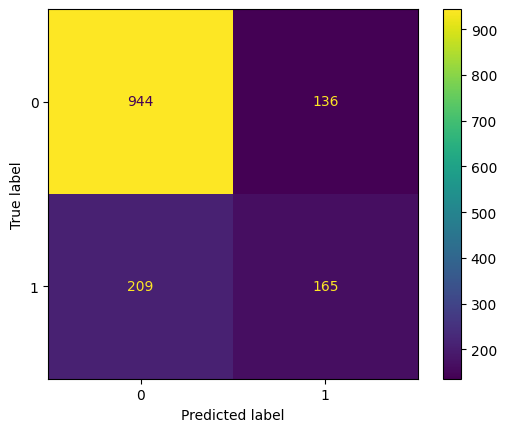

In [40]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion.plot();

## **Hiperparametros KNN**

In [41]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [42]:
# Aplicar búsqueda en grilla con validación cruzada
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Mejor modelo ya entrenado
best_knn = grid_search.best_estimator_

Mejores parámetros encontrados: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


In [43]:
y_pred = best_knn.predict(X_test)
print("Accuracy final:", accuracy_score(y_test, y_pred))

Accuracy final: 0.7874828060522696


In [44]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='binary'))  # Usa 'macro' si es multiclase
print("Recall:", recall_score(y_test, y_pred, average='binary'))
print("F1 Score:", f1_score(y_test, y_pred, average='binary'))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte completo:\n", classification_report(y_test, y_pred))

matriz_confusion = confusion_matrix(y_test, y_pred)

Accuracy: 0.7874828060522696
Precision: 0.6274509803921569
Recall: 0.42780748663101603
F1 Score: 0.5087440381558028
Matriz de confusión:
 [[985  95]
 [214 160]]
Reporte completo:
               precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      1080
         1.0       0.63      0.43      0.51       374

    accuracy                           0.79      1454
   macro avg       0.72      0.67      0.69      1454
weighted avg       0.77      0.79      0.77      1454



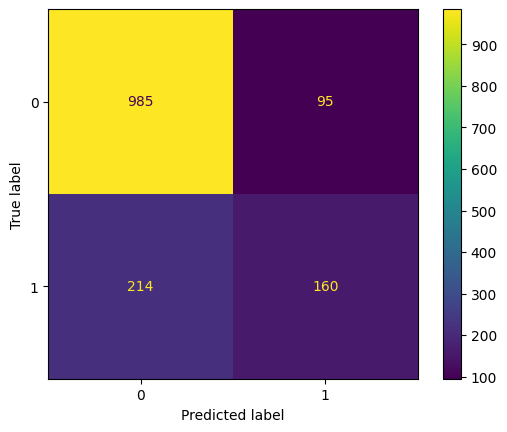

In [45]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion.plot();

## **Exportar modelo XGBoost**

In [46]:
try:
  with open('championXGBoost.pkl', 'wb') as file:
    pickle.dump(mejor_modelo, file)
  print('modelo serializado con exito')
except Exception as e:
  print('Se presento un erro al almacenar el modelo', str(e))

modelo serializado con exito


## **Exportando modelo RandomForestClassifier**

In [47]:
try:
  with open('championRandomForestClassifier.pkl', 'wb') as file:
    pickle.dump(modelo_random_forest, file)
  print('modelo serializado con exito')
except Exception as e:
  print('Se presento un erro al almacenar el modelo', str(e))

modelo serializado con exito


##**Conclusión**

Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.

#  INFORME FINAL - PREDICCION DE CANCELACIÓN DE CLIENTES


##  Objetivos del Proyecto

1. **Preparación de datos para el modelado**: Limpieza, tratamiento de valores faltantes, codificación de variables categóricas y normalización.
2. **Análisis de correlación y selección de variables**: Identificación de relaciones relevantes con la variable objetivo (cancelación).
3. **Entrenamiento de modelos de clasificación**: Aplicación de K-Nearest Neighbors (KNN) y Random Forest.
4. **Evaluación de modelos con métricas**: Análisis con exactitud, precisión, recall, F1-score y matriz de confusión.
5. **Interpretación de resultados y variables importantes.**
6. **Conclusiones estratégicas sobre la cancelación y propuestas de retención.**



##  Preparación y Exploración de Datos

- Se realizó la limpieza de datos, codificación de variables categóricas (One-Hot Encoding), y normalización para escalado uniforme.
- Se analizaron variables como:
  - Tipo de contrato
  - Método de pago
  - Servicio de internet
  - Cargos mensuales
  - Servicios adicionales, entre otros.



##  Análisis de Correlación y Selección de Variables

Variables más relacionadas con la cancelación:

- **Antigüedad del cliente (tenure):** correlación negativa con la cancelación.
- **Tipo de contrato:** contratos mensuales tienen mayor tasa de cancelación.
- **Servicio de Internet (fibra óptica):** correlación positiva con la cancelación.
- **Servicios adicionales (OnlineSecurity, TechSupport, etc.):** su ausencia incrementa el churn.
- **Método de pago (Cheque electrónico) y facturación electrónica:** asociados a mayor churn.
- **Cargos mensuales:** valores altos pueden reflejar percepción negativa del valor recibido.



##  Modelos Entrenados

Se aplicaron dos algoritmos de clasificación:

- **K-Nearest Neighbors (KNN)**
- **Random Forest Classifier**



##  Comparación de Desempeño

| Métrica                  | KNN   | Random Forest | Observaciones                                          |
|--------------------------|-------|----------------|--------------------------------------------------------|
| Exactitud (Accuracy)     | 0.762 | 0.786          | RF más preciso globalmente                             |
| Precisión (Churn)        | 0.56  | 0.64           | RF más preciso al predecir cancelación                 |
| Recall (Churn)           | 0.49  | 0.46           | KNN detecta ligeramente más clientes que cancelan      |
| F1-Score (Churn)         | 0.52  | 0.53           | RF ligeramente superior en balance precisión/recall    |
| Recall (No Churn)        | 0.86  | 0.91           | RF identifica mejor los clientes que no cancelan       |
| Falsos Positivos (FP)    | 145   | 98             | RF comete menos errores prediciendo evasión incorrecta |
| Falsos Negativos (FN)    | 190   | 203            | KNN falla menos en detectar a quienes sí cancelan      |



##  Conclusión Técnica

- **Random Forest** es el modelo con mejor desempeño general.
- **KNN** muestra un mejor **recall** en la clase minoritaria ("Churn"), útil para estrategias donde es crucial no perder ningún cliente.
- Ambos modelos pueden ser optimizados aún más mediante **ajuste de hiperparámetros** y **validación cruzada**.



##  Interpretación de Resultados: Importancia de Variables

| Variable                        | Influencia                | Comentario                                                                |
|---------------------------------|----------------------------|---------------------------------------------------------------------------|
| **Antigüedad**                  | Negativa                  | Clientes nuevos son más propensos a cancelar                              |
| **Tipo de contrato**            | Alta                      | Contratos mes a mes generan más churn                                     |
| **Servicio de fibra óptica**    | Positiva                  | Posibles problemas técnicos o expectativas no cumplidas                   |
| **Servicios adicionales**       | Negativa (si no hay)      | Su ausencia incrementa cancelación (e.g., OnlineSecurity, TechSupport)    |
| **Cheque electrónico (pago)**   | Positiva                  | Puede indicar menor fidelidad o compromiso                                |
| **Cargos mensuales**            | Positiva                  | Mayor monto puede generar percepción de bajo valor                        |
| **Facturación electrónica**     | Ligera positiva           | Tendencia leve a mayor cancelación                                        |



##  Conclusión Estratégica

Los modelos confirman que los clientes con ciertas características tienen mayor probabilidad de cancelar.

Este conocimiento permite desarrollar **estrategias proactivas de retención personalizadas**.



##  Estrategias de Retención Recomendadas

### 1. **Retención temprana: Clientes nuevos**
- Comunicación proactiva en los primeros meses.
- Programas de bienvenida con beneficios.
- Soporte técnico y atención preferencial.

### 2. **Fomentar contratos a largo plazo**
- Ofrecer descuentos, meses gratis o protección de precios.
- Ventajas visibles para comprometerse más tiempo.

### 3. **Mejorar experiencia con fibra óptica**
- Encuestas de satisfacción específicas.
- Optimizar calidad técnica y soporte.

### 4. **Promoción de servicios adicionales**
- Ofertas empaquetadas con OnlineSecurity, TechSupport, etc.
- Pruebas gratuitas para aumentar adopción.

### 5. **Incentivar métodos de pago automatizados**
- Bonificaciones por cambiar de cheque electrónico a débito automático.
- Informar beneficios de automatización y seguridad.

### 6. **Gestión de clientes con altos cargos**
- Evaluar si el valor percibido justifica el costo.
- Ofrecer ajustes de paquete u opciones más personalizadas.

### 7. **Segmentación y acciones predictivas**
- Usar modelos para identificar clientes de alto riesgo.
- Campañas preventivas personalizadas con enfoque empático.



##  Conclusión Final

El análisis de datos y los modelos aplicados han permitido identificar **patrones claros de cancelación**, destacando factores clave como:

- Antigüedad
- Tipo de contrato
- Servicio de internet
- Método de pago

**Random Forest** se posiciona como el modelo más sólido, pero **KNN** aporta valor en estrategias donde la prioridad es no perder clientes.

Con base en estos hallazgos, **TelecomX** puede implementar estrategias de retención focalizadas, **aumentando la fidelización, reduciendo la rotación y mejorando su rentabilidad**.

---
